<a href="https://colab.research.google.com/github/arofenitra/stochastic-methods-of-AI-and-Modelling/blob/main/3_Law_of_Large_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Convergence
### Convergence in probability
A sequence of random varianle $X_1,...$ converge in *probability* in a random variable $X$ ( denoted as $\displaystyle X_n \xrightarrow{p} X$ or $p\displaystyle \lim_{n→∞}X_n=X $ if $$∀ϵ>0: \lim_{n→ ∞}P\left(|X_n-X|>ϵ\right)=0 $$
### Convergence in distribution
A sequence of random varianle $X_1,...$ with cumulative distribution functions $F_1,...$ converge in *distribution* in a random variable $X$ with cdf $F$ if $\displaystyle \lim_{n→∞}F_n(x)=F(x) \; ∀x\in \mathbb{R}$ .
### Almost sure convergence
The sequence $X_n$ converges almost surely or almost everywhere or with probability $1$ or strongly towards $X$ means that : $\displaystyle P(\lim_{n→∞}X_n=X)=1$


**Examples-Properties**:   
- The PDF $f_n=(1+\cos(2πnx))χ_{(0,1)}$ of the distribution $X_n$ converge to uniform (0,1) i.e. $X_n \xrightarrow{d}U_{(0,1)}$ but $f_n$ does not converge at all.
- $X$ is a standard normal random variables, then for the sequence $Y_n=(-1)^nX$, $Y_n \xrightarrow{d}X $ as $P(Y_{2n}\leq x)=P(X\leq x)\; , P(Y_{2n+1}\leq x)=P(X\geq -x)=P(X\leq x)$. But $P(|Y_n-X|\geq ϵ)=P(|X||1-(-1)^n|\geq ϵ)>0$ for $n$ even.
- Convergence in Probability implies convergence in distribution . Suppose that $X_1,...$ converge to $X$ in probability, i.e. $\displaystyle ∀ϵ>0: \lim_{n→ ∞}P\left(|X_n-X|>ϵ\right)=0$.  Let $a\in \mathbb{R}$
$$\{X_n\leq a \}⊆\{X\leq a+ϵ \}∪\{|X_n-X|\geq ϵ \} ⇒ P(\{X_n\leq a \})\leq P(\{X\leq a+ϵ \})+P(\{|X_n-X|\geq ϵ \})
$$
$$\{X\leq a-ϵ \}⊆\{X_n \leq a \}∪\{|X_n-X|\geq ϵ \} ⇒ P(\{X\leq a-ϵ \})\leq P(\{X_n\leq a \})+P(\{|X_n-X|\geq ϵ \})
$$
$${\displaystyle \operatorname {P} (X\leq a-\varepsilon )-\operatorname {P} \left(\left|X_{n}-X\right|>\varepsilon \right)\leq \operatorname {P} (X_{n}\leq a)\leq \operatorname {P} (X\leq a+\varepsilon )+\operatorname {P} \left(\left|X_{n}-X\right|>\varepsilon \right).}$$
$$P(X\leq a-\epsilon)-\lim_{n →∞}P(\{|X_n-X|\geq ϵ \})\leq \lim_{n →∞}P(X_n\leq a)\leq P(X\leq a-\epsilon)+\lim_{n →∞}P(\{|X_n-X|\geq ϵ \})$$
$$F(a-ϵ)\leq \lim_{n →∞}F_n(a)\leq F(a+ϵ) \; ∀ϵ>0 ⇒ \lim_{n →∞}F_n(a)=F(a)$$


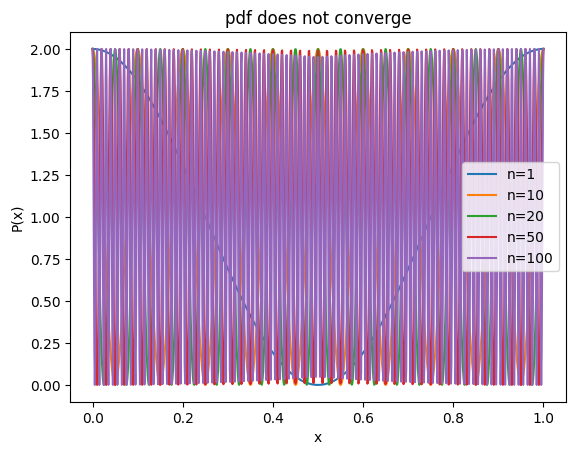

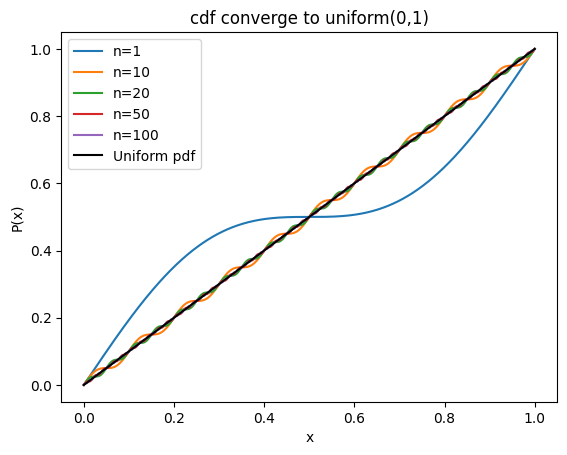

In [ ]:
def pdf_f(n,x):
  return 1+np.cos(2*np.pi*n*x)

X=np.linspace(0,1,1000)
n_values=[1,10,20,50,100]
for n in n_values:
  plt.plot(X,pdf_f(n,X),label="n="+str(n))
plt.legend()
plt.xlabel("x")
plt.ylabel("P(x)")
plt.title("pdf does not converge")
plt.show()
def cdf_f(n,x):
  return x+np.sin(2*np.pi*n*x)/(2*np.pi*n)
X=np.linspace(0,1,1000)
n_values=[1,10,20,50,100]
for n in n_values:
  plt.plot(X,cdf_f(n,X),label="n="+str(n))
plt.plot(X,X,color="black",label="Uniform pdf")
plt.legend()
plt.xlabel("x")
plt.ylabel("P(x)")
plt.title("cdf converge to uniform(0,1)")
plt.show()

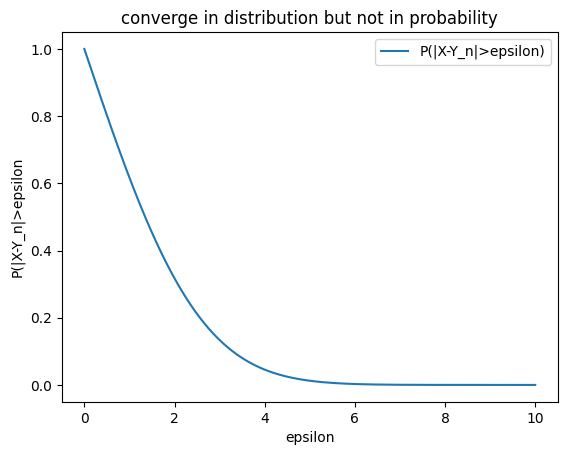

In [4]:
def probability(epsilon): # P(|X-Y_n|>epsilon)=P(X>epsilon/2)+P(X<-epsilon/2)
  return 1-sp.stats.norm.cdf(epsilon/2)+sp.stats.norm.cdf(-epsilon/2)

x=np.linspace(0,10,1000)
plt.plot(x,probability(x),label="P(|X-Y_n|>epsilon)")
plt.title("converge in distribution but not in probability")
plt.xlabel("epsilon")
plt.ylabel("P(|X-Y_n|>epsilon")
plt.legend()
plt.show()

## Sum of random variables
Let $X_i$ be a sequence of independant identicaly distributed random variables and $X=X_1+...+X_n$. Then:
- Expected value: $$\mathbb{E}[X]=\mathbb{E}[X_1+...+X_n]=\mathbb{E}[X_1]+...+\mathbb{E}[X_n]$$
- Variance: $$Var(X)=cov(X_1+...+X_n,X_1+...+X_n)=\sum_{i=1}^n\sum_{j=1}^ncov(X_i,X_j)=Var(X_1+...+X_n)=Var(X_1)+...+Var(X_n)$$

- Characteristic function: $$φ_X(t)=\mathbb{E}[\exp(itX)]=\mathbb{E}[\exp(itX_1)...\exp(itX_n)]=\mathbb{E}[\exp(itX_1)]...\mathbb{E}[\exp(itX_n)]=\varphi_{X_1}(t)...φ_{X_n}(t)$$
- Probability distribution function :
$$P(x)=(P_{X_1}*...*P_{X_n})(x)$$
(* is the convolution) or for the laplace or fourier transform :
$$F[P](w)=F[P_{X_1}](w)...F[P_{X_n}](w)$$
## Law of Large numbers and central limit theorem
Let $X_i$ be a sequence of independant identicaly distributed random variable with mean $\mathbb{E}[X_i]=μ,  \; ∀i$ (some authors consider also variance : $Var(X_i)=σ^2 \; ∀i$ )and suppose $\bar{X}_n=\frac{1}{n}(X_1+...+X_n)$,  then
### Weak Law of Large numbers (WLLN):
$$\bar{X_n}\xrightarrow{p}μ$$
i.e. $$∀ϵ>0 : \lim_{n→∞}P(|\bar{X}_n-μ|>ϵ)=0$$
*Proof of WLLN with variance*:

For $\bar{X}_n=\frac{1}{n}(X_1+...X_n)⇒ \mathbb{E}[\bar{X}_n]=\frac{1}{n}(\mathbb{E}[X_1]+...+\mathbb{E}[X_n])=μ$. ( as each $X_i$ is iid in some case of $Var(X_i)=σ^2 \; ∀i$, then $\displaystyle Var(\bar{X}_n)=\frac{1}{n^2}(Var(X_1)+...+Var(X_n))=\frac{σ^2}{n}$.  
From chebyshev inequality :
$$∀ϵ>0: P(|\bar{X}_n-μ|>ϵ)\leq \frac{Var[\bar{X}_n]}{ϵ^2}=\frac{σ^2}{nϵ^2} ⇒\lim_{n→∞}P(|\bar{X}_n-μ|>ϵ)=0$$

*Proof of WLLN with characteristics functions*:
As each $X_i$ are iid:
$$φ_{X_1}(t)=...=φ_{X_n}(t)=\mathbb{E}[\exp(itX_1)]=1+it\mathbb{E}[X_1]-\frac{t^2}{2!}\mathbb{E}[X_1^2]+...=1+it\mathbb{E}[X_1]+o_{t→0}(t)$$

$$φ_{\bar{X}_n}(t)=\mathbb{E}[\exp(it\bar{X}_n)]=\mathbb{E}\left[\exp\left(\frac{it}{n}(X_1+...+X_n\right)\right]=\mathbb{E}\left[\exp\left(\frac{it}{n}X_1 \right)\right] ... \mathbb{E}\left[\exp\left(\frac{it}{n}X_n \right)\right]=φ_{X_1}^n\left(\frac{t}{n}\right)=\left(1+i\frac{t}{n}\mathbb{E}[X_1]+o_{n→∞}(\frac{t}{n})\right)^n$$
$$\lim_{n→∞}φ_{\bar{X}_n}(t)=\lim_{n→∞}\left(1+itμ/n \right)^n=\exp(iμt)=\mathbb{E}[\exp(itX)]=φ_X(t)$$
where $P(X=μ)=1$
$$⇒\bar{X_n}\xrightarrow{p}μ$$

### Strong law of Large numbers (SLLN):
$$P(\lim_{n→∞}\bar{X_n}=μ)= 1$$


### Central limit theorem
$$\sqrt{n}\left(\frac{1}{n}\sum_{i=1}^nX_i-μ \right) \xrightarrow{d} N(0,σ^2)$$
*proof:*
Consider $$X=\sqrt{n}\left(\frac{1}{n}\sum_{i=1}^nX_i-μ \right).$$
As $\mathbb{E}[X_i]=μ, Var(X_i)=σ^2>0$, $X_i$ iid random variable, then:  
$$\mathbb{E}[X]=\sqrt{n}\left(\frac{1}{n}\sum_{i=1}^n\mathbb{E}[X_i]-μ \right)=0$$
$$Var(X)=\frac{1}{n}\sum_{i=1}^nVar(X_i)=σ^2>0$$
$$φ_X(t)=\mathbb{E}\left[\exp\left(\sqrt{n}\left(\frac{1}{n}\sum_{i=1}^nit(X_i-μ) \right)\right)\right]=\mathbb{E}\left[\exp\left(\frac{it}{\sqrt{n}}(X_1-μ) \right)\right]\cdots \mathbb{E}\left[\exp\left(\frac{it}{\sqrt{n}}(X_n-μ) \right)\right]=\mathbb{E}\left[\exp\left(\frac{it}{\sqrt{n}}(X_1-μ) \right)\right]^n$$
$$φ_X(t)=\left(1+\frac{it}{\sqrt{n}}\mathbb{E}[X_1-μ]-\frac{t^2}{2n}\mathbb{E}[(X_1-μ)^2]+... \right)^n=(1-\frac{t^2σ^2}{2n}+o(1/\sqrt{n}))^n$$
$$\lim_{n→∞}φ_X(t)=\exp(-\frac{σ^2}{2}(t)^2)⇒\sqrt{n}\left(\frac{1}{n}\sum_{i=1}^nX_i-μ \right) \xrightarrow{d} N(0,σ^2)$$



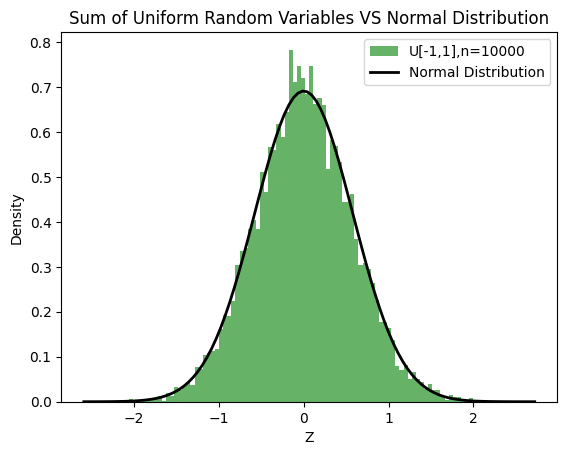

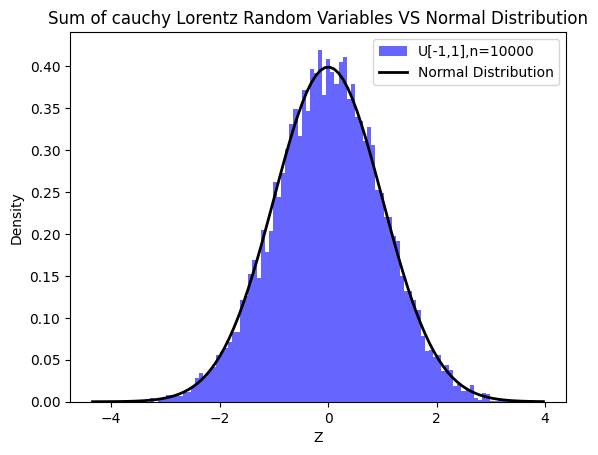

In [67]:
norm=sp.stats.norm
# Number of samples
n = 10000

# Generate n samples of uniform random variables U[-1,1]
X = np.random.uniform(-1, 1, (n, n))

# Sum the uniform random variables and normalize by sqrt(n)
Z = np.sum(X, axis=1) / np.sqrt(n)

# Plot the histogram of Z
plt.hist(Z, bins=int(np.sqrt(n)), density=True, alpha=0.6, color='g', label='U[-1,1],n='+str(n))

# Plot the normal distribution for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, np.sqrt(1/3))  # Mean 0, Variance 1/3 for uniform[-1,1]
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Sum of Uniform Random Variables VS Normal Distribution')
plt.xlabel('Z')
plt.ylabel('Density')
plt.legend()
plt.show()

# Generate n samples of exponential random variables U[-1,1]
X = np.random.exponential(scale=1.0,size= (n, n))

# Sum the exponential random variables and normalize by sqrt(n)
Z = np.sum(X, axis=1) / np.sqrt(n)-np.sqrt(n)

# Plot the histogram of Z
plt.hist(Z, bins=int(np.sqrt(n)), density=True, alpha=0.6, color='b', label='U[-1,1],n='+str(n))

# Plot the normal distribution for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)  # Mean 100, Variance 1 for expo()
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Sum of cauchy Lorentz Random Variables VS Normal Distribution')
plt.xlabel('Z')
plt.ylabel('Density')
plt.legend()
plt.show()

### Application :monte carlo methods and Order of accuracy using  
- Algorithm of Computing approximate value of $π$ and its  accuracy using monte-Carlo methods.

As the cirlce of center 1 has area $π/4$, The idea is that we take $n$ numbers : $(x_1,y_1),...,(x_n,y_n)$ uniformly on $[0,1]^2$. Then $\displaystyle \frac{π}{4}≈\frac{\#\{(x_i,y_i):x_i^2+y_i^2\leq 1 \}}{n}$.
- - Generate two random number $\forall i\leq 1: X_i,Y_i$ uniformly on $[0,1]$.

- - $∀i:$ Consider the random variable $Z_i=1$ if $X_i^2+Y_i^2\leq 1$ otherwise : $Z_i=0$.

Hence $$p=P(Z_i=1)=P(X_i^2+Y_i^2\leq 1)=\frac{π/4}{1}=\frac{π}{4}\; ; \; P(Z_i=0)=1-\frac{π}{4}\; ; \; \mathbb{E}[Z_i]=\frac{π}{4} \; ; \; Var(Z_i)=\frac{π}{4}(1-\frac{π}{4})$$
For $ϵ>0\; ; \; \bar{Z}_n=\frac{1}{n}(Z_1+...+Z_n)$, chebyshev inequality say that $$P(|\bar{Z}_n-\frac{\pi}{4}|\geq ϵ)\leq \frac{π(4-π)}{n(4ϵ)^2} ⇔ P(π/4-ϵ<\bar{Z}_n<π/4+ϵ)\geq 1-\frac{π(4-π)}{n(2ϵ)^2}\geq 1-\frac{\max_{p\in [0,1]}(p(1-p))}{nϵ^2}$$

$$
P(|\bar{Z}_n-\frac{\pi}{4}|\geq ϵ)\leq \frac{1}{n(2ϵ)^2} $$
For accuracy $ϵ=10^{-m}/4$ (accurate digit of $π$), and $δ=0.05$(for 95% confidence level):
$$\frac{1}{n(2ϵ)^2}=\frac{4*100^m}{n}\leq \delta ⇒ n\geq \frac{4*100^m}{δ}=80*100^m$$
 So



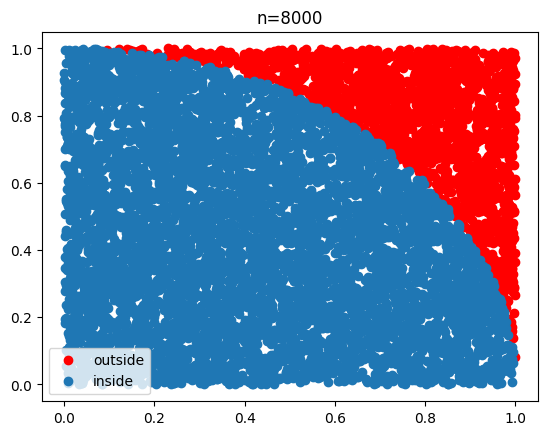

pi= 3.141592653589793
approx MC pi= 3.138
error approximation= 0.0035926535897932155
number of correct digit of pi= 2


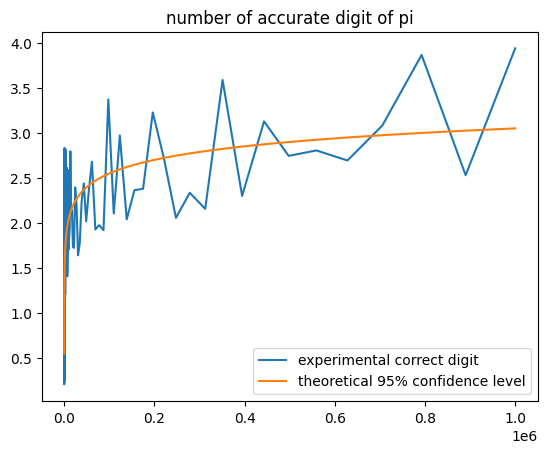

In [46]:
import numpy as np
import matplotlib.pyplot as plt

n = 80*100
X = np.random.uniform(0, 1, n)
Y = np.random.uniform(0, 1, n)

def MC_pi(n):
  X = np.random.uniform(0, 1, n)
  Y = np.random.uniform(0, 1, n)

  # Vectorized computation to determine points inside the circle
  inside = X**2 + Y**2 <= 1

  # Separate points inside and outside the circle
  Xi = X[inside]
  Yi = Y[inside]
  Xo = X[~inside]
  Yo = Y[~inside]
  return Xi,Yi,Xo,Yo

def correct_digits(approx_pi, true_pi):
    # Calculate the number of correct digits
    diff = np.abs(approx_pi - true_pi)
    if diff == 0:
        return float('inf')  # Perfect match
    return -np.log10(diff)



Xi,Yi,Xo,Yo=MC_pi(n)
# Plotting
plt.plot(Xo, Yo, "o", color="red", label="outside")
plt.plot(Xi, Yi, "o", label="inside")
plt.title("n=" + str(n))
plt.legend()
plt.show()

# Calculate the approximate value of pi
approx_pi = 4 * len(MC_pi(n)[0]) / n
error = np.abs(np.pi - approx_pi)
true_pi=np.pi
print("pi=", np.pi)
print("approx MC pi=", approx_pi)
print("error approximation=", error)
print("number of correct digit of pi=",int(correct_digits(approx_pi, true_pi)))

n_values = np.logspace(1, 6, 100, dtype=int)  # Sample sizes from 10 to 1,000,000
accuracies = np.zeros(len(n_values))

true_pi = np.pi

for i, n in enumerate(n_values):
    approx_pi = 4 * len(MC_pi(n)[0]) / n
    accuracies[i] = correct_digits(approx_pi, true_pi)
plt.plot(n_values,accuracies,label="experimental correct digit")
plt.plot(n_values,0.5*(np.log10(n_values/80))+1,label="theoretical 95% confidence level")
plt.title("number of accurate digit of pi")
plt.legend()
plt.show()


- Algorithm of computing integral of a continuous function and its accuracy.

Let $a<b \in \mathbb{R}$ and $f$ be continuous function on $[a,b]$, we want to compute $∫_a^b f(x)dx$.   
The idea is that we take $n$ numbers : $(x_1,y_1),...,(x_n,y_n)$ uniformly on $\displaystyle [a,b]×\left[\min_{x\in [a,b]}f(x),\max_{x\in [a,b]}f(x)\right]$. Then $\displaystyle ∫_a^b f(x)dx≈\frac{\#\{(x_i,y_i):y_i\leq f(x_i) \}}{n}$.
- - Generate two random number $\forall i\leq 1: X_i,Y_i$ uniformly on $[0,1]$.

- - $∀i:$ Consider the random variable $Z_i=1$ if $Y_i\leq f(X_i)$ otherwise : $Z_i=0$.

Hence $$p=P(Z_i=1)=∫_a^b f(x)dx\; ; \; P(Z_i=0)=1-p\; ; \; \mathbb{E}[Z_i]=p \; ; \; Var(Z_i)=p(1-p)$$
For $ϵ>0\; ; \; \bar{Z}_n=\frac{1}{n}(Z_1+...+Z_n)$, chebyshev inequality say that $$P(|\bar{Z}_n-p|\geq ϵ)\leq \frac{Var(\bar{Z}_n)}{nϵ^2} ⇔ P(π/4-ϵ<\bar{Z}_n<π/4+ϵ)\geq 1-\frac{π(4-π)}{n(2ϵ)^2}\geq 1-\frac{\max_{p\in [0,1]}(p(1-p))}{nϵ^2}$$

$$
P(|\bar{Z}_n-p|\geq ϵ)\leq \frac{1}{n(2ϵ)^2} $$
For accuracy $ϵ=10^{-m}$ of $∫_a^b f(x)dx$, and $δ=0.05$(for 95% confidence level):
$$\frac{1}{n(2ϵ)^2}=\frac{100^m}{4n}\leq \delta ⇒ n\geq \frac{100^m}{4δ}=5*100^m$$
We can find an approximate value of $π$ as $\displaystyle π=4∫_0^1\frac{dx}{1+x^2}$.


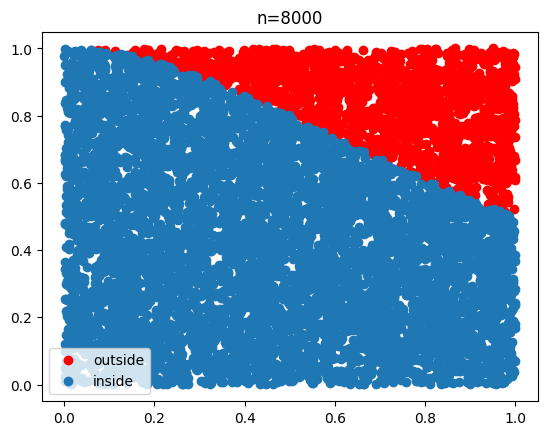

pi= 3.141592653589793
approx MC pi= 3.147
error approximation= 0.0054073464102066815
number of correct digit of pi= 2


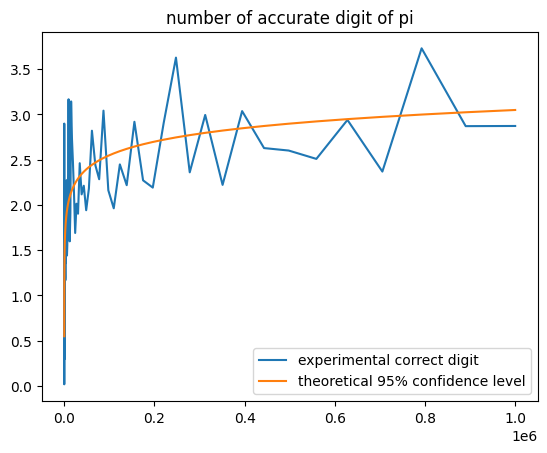

In [49]:

n = 80*100
X = np.random.uniform(0, 1, n)
Y = np.random.uniform(0, 1, n)

def MC_pi(n):
  X = np.random.uniform(0, 1, n)
  Y = np.random.uniform(0, 1, n)

  # Vectorized computation to determine points inside the circle
  inside = Y <= 1/(1+X**2)

  # Separate points inside and outside the circle
  Xi = X[inside]
  Yi = Y[inside]
  Xo = X[~inside]
  Yo = Y[~inside]
  return Xi,Yi,Xo,Yo

def correct_digits(approx_pi, true_pi):
    # Calculate the number of correct digits
    diff = np.abs(approx_pi - true_pi)
    if diff == 0:
        return float('inf')  # Perfect match
    return -np.log10(diff)



Xi,Yi,Xo,Yo=MC_pi(n)
# Plotting
plt.plot(Xo, Yo, "o", color="red", label="outside")
plt.plot(Xi, Yi, "o", label="inside")
plt.title("n=" + str(n))
plt.legend()
plt.show()

# Calculate the approximate value of pi
approx_pi = 4 * len(MC_pi(n)[0]) / n
error = np.abs(np.pi - approx_pi)
true_pi=np.pi
print("pi=", np.pi)
print("approx MC pi=", approx_pi)
print("error approximation=", error)
print("number of correct digit of pi=",int(correct_digits(approx_pi, true_pi)))

n_values = np.logspace(1, 6, 100, dtype=int)  # Sample sizes from 10 to 1,000,000
accuracies = np.zeros(len(n_values))

true_pi = np.pi

for i, n in enumerate(n_values):
    approx_pi = 4 * len(MC_pi(n)[0]) / n
    accuracies[i] = correct_digits(approx_pi, true_pi)
plt.plot(n_values,accuracies,label="experimental correct digit")
plt.plot(n_values,0.5*(np.log10(n_values/80))+1,label="theoretical 95% confidence level")
plt.title("number of accurate digit of pi")
plt.legend()
plt.show()
